In [2]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

# <span style="color:red;"><center> TD - Tri par sélection et par insertion</span>

## 1. Implémentation des tris

### 1.1 Tri par sélection

**Fonction** tri_selection (tab)
> *tab est un tableau de n valeurs numériques qui est trié en place (tab est modifié mais la fonction ne retourne rien).*  
>
> *float* : mini  *# La valeur minimale trouvée*  
> *int* : i_mini *# L'indice de la valeur minimale trouvée*  
> n $\leftarrow$ taille(tab)  
> *# i correspond au premier indice du tableau restant à trier, quand i=n-2 le tableau à trier correspond aux 2 derniers éléments de tab*  
> **Pour** i allant de 0 à n-2 **faire**   
>> i_mini $\leftarrow$ i  *# On initialise avec le premier indice du tableau à trier.*  
>> mini $\leftarrow$ tab[i]  *# On initialise avec la première valeur du tableau à trier.*  
>> **Pour** j allant de i+1 à n-1 **faire**  *# On parcourt le reste du tableau à trier.*
>>> **Si** tab[j] < mini **alors**  *# Si on trouve une valeur plus petite on met à jour i_mini et mini.*  
>>>> i_mini $\leftarrow$ j  
>>>> mini $\leftarrow$ tab[j]  
>>
>> **Permuter** tab[i] et tab[i_mini]  *# On permute la première valeur du tableau non-trié avec le minimum trouvé*

**Q1. A partir du pseudo-code ci-dessus, implémenter l'algorithme de tri par sélection en Python.**

In [50]:
#Question 1
def tri_selection(tab):
    """tab est un tableau de n valeurs numériques qui est trié en place (tab est modifié mais la fonction ne retourne rien)."""
    ...

### 1.2 Tri par insertion

**Fonction** tri_insertion (tab)
> *tab est un tableau de n valeurs numériques qui est trié en place (tab est modifié mais la fonction ne retourne rien).*  
>
> n $\leftarrow$ taille(tab)  
> *# i correspond au dernier indice du tableau déjà trié, quand i=n-2 il ne reste plus qu'à insérer au bon endroit le dernier élément du tableau, c'est donc bien la dernière itération.*  
> **Pour** i allant de 0 à n-2 **faire**   
>> j $\leftarrow$ i+1  *# j est l'indice de la valeur à insérer dans le tableau déjà trié.*  
>> **Tant que** j >0 **et** tab[j]<tab[j-1] **faire**  *# L'indice j de la valeur à insérer est décrémentée tant qu'on est pas au début du tableau et qu'on a pas trouvé une valeur supérieure à sa gauche.*
>>> **Permuter** tab[j] et tab[j-1]  *# On permute la valeur à insérer avec celle qui est à sa gauche.*  
>>> j $\leftarrow$ j-1  *# On décrémente j puisque la valeur à insérer est décalée d'un cran vers la gauche.*

**Q2. A partir du pseudo-code ci-dessus, implémenter l'algorithme de tri par insertion en Python.**

In [51]:
# Question 2
def tri_insertion(tab):
    """tab est un tableau de n valeurs numériques qui est trié en place (tab est modifié mais la fonction ne retourne rien)."""
    ...

### 1.3 Test des tris

**Utiliser le code ci-dessous pour tester vos algorithmes de tri sur une liste d'entiers aléatoires.** On pourra faire varier la taille $N$ de la liste et les bornes inférieures et supérieures `valMin` et `valMax` des valeurs aléatoires et on utlisera **les 2 algorithmes de tri** précédents. Dans tous les cas, **on vérifiera juste que les liste affichées après le tri sont bien triées par ordre croissant**.

In [52]:
from random import randint
#Création d'une Liste de N entiers aléatoires tirés entre valMin et valMax
N=10
valMin=0
valMax=10
L = [randint(valMin,valMax) for i in range(N)]

#Affichage de la liste aléatoire et du résultat du tri
print('Liste de départ :',L)
tri_selection(L)
#tri_insertion(L) #Décommenter cette ligne et commenter la ligne du dessus pour tester tri_insertion
print('Liste triée :',L)

Liste de départ : [9, 10, 2, 1, 3, 10, 10, 2, 1, 7]
Liste triée : [9, 10, 2, 1, 3, 10, 10, 2, 1, 7]


Le fait de trier les liste **en place** risque de compliquer un peu les tests. En effet, si je lance les deux tris à la suite sur la même liste, le deuxième tri s'effectuera sur une liste déjà triée. Je ne pourrai donc **pas comparer les deux algorithmes**.

**Q3. Modifier vos fonctions `tri_selection(tab)` et `tri_insertion(tab)` afin qu'elles retournent la liste triée, sans modifier la liste passée en argument, puis tester les algorithmes modifiés avec le code à compléter ci-dessous.**

In [53]:
# Question 3
from random import randint
#Création d'une Liste de N entiers aléatoires tirés entre valMin et valMax
N=10
valMin=0
valMax=10
L = [randint(valMin,valMax) for i in range(N)]

#Affichage de la liste aléatoire et du résultat du tri
print('Liste de départ :', L)
print('Liste triée par sélection :', ) #Ligne à compléter
print('Liste triée par insertion :', ) #Ligne à compléter

Liste de départ : [5, 4, 5, 1, 10, 0, 5, 7, 7, 0]
Liste triée par sélection :
Liste triée par insertion :


## 2. Mesures de complexité

### 2.1 Comparaison des algorithmes

On utilise la commande `timeit` pour comparer le temps d'exécution des tris pas insertion et par sélection, ainsi que le tri intégré dans Python (fonction `sorted`) qui est basée sur l'algorithme *timsort* (association du tri fusion et du tri par insertion). En moyenne, le tri par insertion devrait être environ 2 fois plus rapide que le tri par sélection.

In [54]:
from timeit import Timer

#Création d'une Liste de N entiers aléatoires tirés entre valMin et valMax
N=1000
valMin=0
valMax=N
L = [randint(valMin,valMax) for i in range(N)]

print("Durée d'exécution pour le tri par sélection :")
%timeit tri_selection(L)
print("Durée d'exécution pour tri par insertion :")
%timeit tri_insertion(L)
print("Durée d'exécution pour timsort :")
%timeit sorted(L)

Durée d'exécution pour le tri par sélection :
184 ns ± 22.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
Durée d'exécution pour tri par insertion :
193 ns ± 14.4 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
Durée d'exécution pour timsort :
254 µs ± 25.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### 2.2 Pire et meilleur des cas

Le tri par sélection fonctionne de la même façon quelle que soit la liste fournie en entrée. Par contre, nous avons vu que que **le fonctionnement du tri par insertion pouvait varier selon les cas**. La comparaison précédente donne-t-elle le même résultat dans le pire et le meilleur cas pour le tri par insertion ?

**Q4. Modifier le programme précédent pour renouveler la comparaison dans le pire et le meilleur des cas pour l'agorithme de tri par insertion.**

In [56]:
# Question 4
N=1000
#Création d'une Liste de N entiers dans le pire des cas
L = []
print("PIRE DES CAS :")
print("Durée d'exécution pour le tri par sélection :")
%timeit tri_selection(L)
print("Durée d'exécution pour tri par insertion :")
%timeit tri_insertion(L)
print("Durée d'exécution pour timsort :")
%timeit sorted(L)

#Création d'une Liste de N entiers dans le meilleur des cas
L = []

print("MEILLEUR DES CAS :")
print("Durée d'exécution pour le tri par sélection :")
%timeit tri_selection(L)
print("Durée d'exécution pour tri par insertion :")
%timeit tri_insertion(L)
print("Durée d'exécution pour timsort :")
%timeit sorted(L)

PIRE DES CAS :
Durée d'exécution pour le tri par sélection :
88.9 ns ± 5.07 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
Durée d'exécution pour tri par insertion :
85.2 ns ± 4.52 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
Durée d'exécution pour timsort :
173 ns ± 7.8 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
MEILLEUR DES CAS :
Durée d'exécution pour le tri par sélection :
93.4 ns ± 8.02 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
Durée d'exécution pour tri par insertion :
83.3 ns ± 4.58 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
Durée d'exécution pour timsort :
171 ns ± 9.69 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


### 2.3 Vérification de la complexité

On veut vérifier que la **complexité moyenne des algorithmes de tri par sélection et insertion sont quadratiques** et la comparer à celle du tri intégré dans Python.

Le code ci-dessous permet de tracer les **courbes donnant le temps d'exécution des 3 algorithmes de tri en fonction de la taille n du tableau à trier**. Une courbe de modélisation quadratique est ajoutée pour les tris par sélection et insertion.

N =  100
N =  200
N =  300
N =  400
N =  500
N =  600
N =  700
N =  800
N =  900
N =  1000
Modele 1 : y = 1.80E-12*x²
Modele 2 : y = 1.24E-12*x²


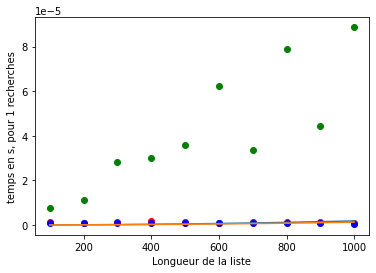

In [57]:
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

def quadratique (x,a): # fonction quadratique de la forme y=f(a*x²)
    return a*x*x

# Faire une boucle sur les valeurs de n pour calculer les temps d'exécution sur chacun des 2 algorithme
# La liste abscisse contiendra les valeurs de n, les listes ordonnee1, ordonnee2 et ordonnee3 contiendront les temps
# d'exécution des 3 algorihtmes. 
abscisse=[]
ordonnee1=[]
ordonnee2=[]
ordonnee3=[]
modele1=[]
modele2=[]

Nbessai=1
Nbrepet=1
inc=100
debut=100
fin=1100
for N in range(debut,fin,inc): # la taille N du tableau varie de debut à fin par pas de inc
    print('N = ',N)
    abscisse.append(N) # N sera en abscisse
    L=sorted([randint(0,N) for k in range(N)],reverse=True) # on génère un tableau d'entiers aléatoire entre 0 et N
    t1 = Timer("tri_selection(L)", globals=globals()) # on crée un timer pour tri_selection
    ordonnee1.append(min(t1.repeat(Nbessai,Nbrepet))) # on ajoute à ordonnée 1 le temps minimum sur Nbessai essais de Nbrepet recherches
    t2 = Timer("tri_insertion(L)", globals=globals()) # on crée un timer pour tri_insertion
    ordonnee2.append(min(t2.repeat(Nbessai,Nbrepet))) # on ajoute à ordonnée 2 le temps minimum sur Nbessai essais de Nbrepet recherches
    t3 = Timer("sorted(L)", globals=globals()) # on crée un timer pour sorted
    ordonnee3.append(min(t3.repeat(Nbessai,Nbrepet))) # on ajoute à ordonnée 2 le temps minimum sur Nbessai essais de Nbrepet recherches

#calcul des paramètres de modélisation pour ordonnee1 et ordonnee2
parametres1, covariance = curve_fit(quadratique, abscisse, ordonnee1) 
parametres2, covariance = curve_fit(quadratique, abscisse, ordonnee2)

for i in range(len(abscisse)) : #construction des ordonnées pour les 2 modèles
    modele1.append(quadratique(abscisse[i],*parametres1))
    modele2.append(quadratique(abscisse[i],*parametres2))
    
# courbes pour les modèles avec légende    
plt.plot(abscisse,modele1)
plt.plot(abscisse,modele2)
print('Modele sélection : y = {:.2E}*x²'.format(*parametres1))
print('Modele insertion : y = {:.2E}*x²'.format(*parametres2))

# nom des axes    
plt.xlabel('Longueur de la liste')
plt.ylabel('temps en s, pour {} recherches'.format(Nbessai))
# definition des courbes
plt.scatter(abscisse,ordonnee1,color='red')
plt.scatter(abscisse,ordonnee2,color='blue')
plt.scatter(abscisse,ordonnee3,color='green')
#tracé du graphique
plt.show()

## 3. Preuve de la correction

### 3.1 Tri par sélection

**L'invariant de boucle** est :  
> "A la fin de l'itération $i$, les $i+1$ premiers éléments du tableau sont triés par ordre croissant et le reste du tableau (non trié) ne contient que des valeurs supérieures ou égales à celles déjà triées".

**Q.5 Montrer que cette propriété est vraie pour $i=0$, puis, que si elle est vraie pour $i=k$ alors elle est encore vraie pour $i=k+1$.**

**Réponse :**

*A compléter ...*

### 3.2 Tri par insertion

**L'invariant de boucle** est :  
> "A la fin de l'itération $i$, les $i+2$ premiers éléments du tableau sont triés par ordre croissant".

**Q6. Montrer que cette propriété est vraie pour $i=0$, puis, que si elle est vraie pour $i=k$ alors elle est encore vraie pour $i=k+1$.**

**Réponse :** 

*A compléter ...*